In [27]:
!pip install pycoingecko
!pip install plotly
!pip install mplfinance

In [28]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.offline import plot
import matplotlib.pyplot as plt
import datetime
from pycoingecko import CoinGeckoAPI
from mplfinance.original_flavor import candlestick2_ohlc

In [29]:
dict_={'a':[11,21,31],'b':[12,22,32]}

In [30]:
df=pd.DataFrame(dict_)
type(df)

pandas.core.frame.DataFrame

In [31]:
df.head()

,a,b
0,11,12
1,21,22
2,31,32


In [32]:
df.mean()

a    21.0
b    22.0
dtype: float64

In [33]:
cg=CoinGeckoAPI()

bitcoin_data=cg.get_coin_market_chart_by_id(id='bitcoin',vs_currency='usd',days=30)

In [34]:
type(bitcoin_data)

dict

In [35]:
bitcoin_price_data=bitcoin_data['prices']

bitcoin_price_data[0:5]

#The response we get is in the form of a JSON which includes the price, market caps, and total volumes along with timestamps for each observation. We are focused on the prices so we will select that data.

[[1641682870751, 42003.66945857541],
 [1641686602796, 41756.66232397826],
 [1641690971797, 42000.240211691154],
 [1641693648250, 41733.04713333396],
 [1641697257413, 42241.227639919394]]

In [36]:
#turn this data into a Pandas DataFrame

data=pd.DataFrame(bitcoin_price_data, columns=['Timestamp','Price'])

In [43]:
data['date']=data['Timestamp'].apply(lambda d: datetime.date.fromtimestamp(d/1000.0))

In [44]:
candlestick_data = data.groupby(data.date, as_index=False).agg({"Price": ['min', 'max', 'first', 'last']})

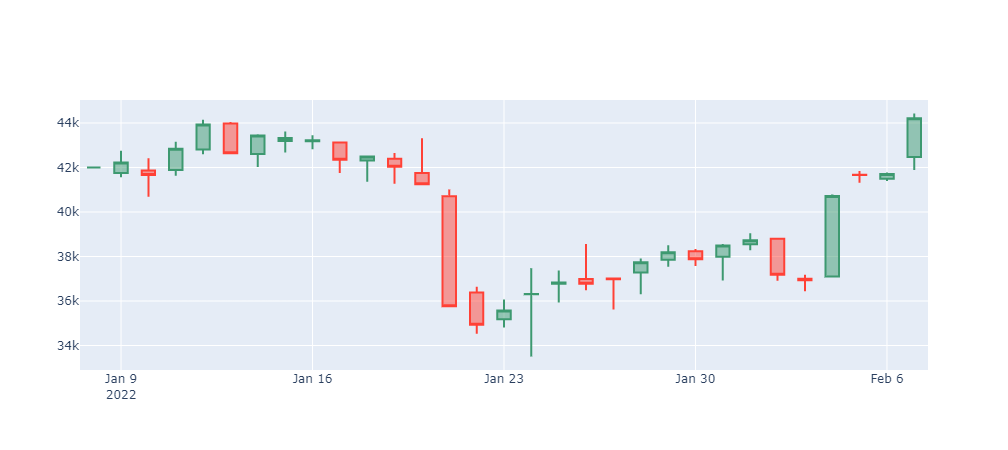

In [48]:
fig=go.Figure(data=[go.Candlestick(x=candlestick_data['date'], open=candlestick_data['Price']['first'],high=candlestick_data['Price']['max'],low=candlestick_data['Price']['min'],close=candlestick_data['Price']['last'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()